K-Means clustering with Mall Customer Segmentation Data


In [24]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.cluster import KMeans
from collections import Counter

import warnings
warnings.filterwarnings ('ignore')

In [4]:
# Loading the Mall_Customers dataset

df = pd.read_csv ('Mall_Customers.csv')
df.head ()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Preprocessing data

df.isnull ().sum ()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

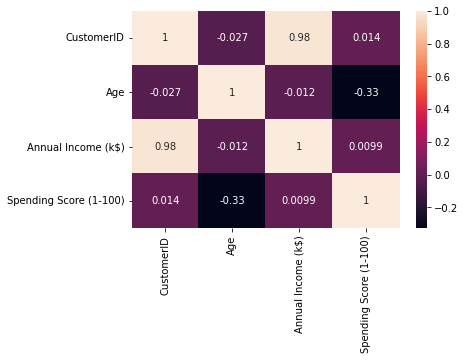

In [6]:
# Finding correlation between all features using heatmap

sn.heatmap (df.corr (), annot = True)

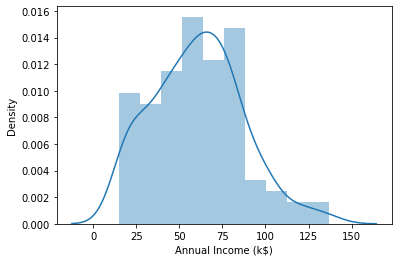

In [7]:
# Checking distribution of annual income

sn.distplot (df ['Annual Income (k$)'])

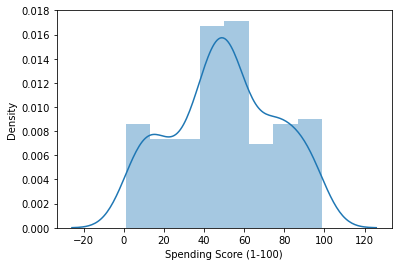

In [8]:
# Checking distribution of spending score

sn.distplot (df ['Spending Score (1-100)'])

In [17]:
# We take only the annual income and spending score into our consideration

X = df [['Annual Income (k$)', 'Spending Score (1-100)']]
X.head ()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
# We will find Withing Clusters Sum of Squares (WCSS) to implement the elbow graph

wcss = []

for i in range (1, 11):
  clustering = KMeans (i)
  clustering.fit (X)
  wcss.append (clustering.inertia_)

kms = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

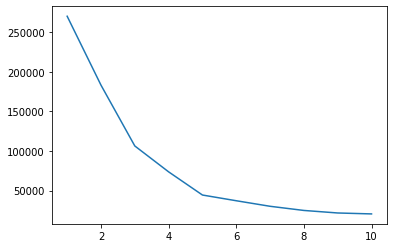

In [15]:
# We will find the elbow graph

sn.lineplot (x = kms, y = wcss)

In [14]:
# Assuming the number of clusters as 5

clusters = KMeans (5)

In [18]:
# Fiting the dataset into the K Means

clusters.fit (X)

KMeans(n_clusters=5)

In [20]:
# Predicting the labels of the input data

Y = clusters.predict (X)

In [21]:
# Adding the labels to the dataset

df ['Cluster Labels'] = Y
df.head ()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [26]:
# Couting cluster labels

labels = clusters.labels_
Counter (labels)

Counter({4: 23, 3: 22, 1: 81, 2: 39, 0: 35})

In [27]:
# Finding cluster centers

clusters.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

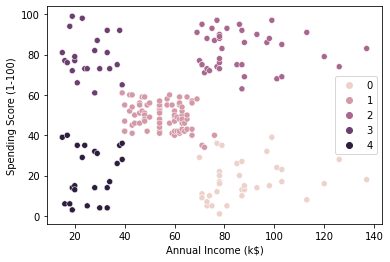

In [31]:
# Plotting scatter plot to determine various customer segments

sn.scatterplot (data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = labels)

In [33]:
# Determining customers in each cluster

cust1 = df [df ["Cluster Labels"] == 1]
print('Number of customer in 1st group=', len(cust1))
print('Their Customer IDs are -', cust1["CustomerID"].values)
print("--------------------------------------------")

cust2 = df [df ["Cluster Labels"] == 2 ]
print('Number of customer in 2nd group=', len(cust2))
print('Their Customer IDs are -', cust2["CustomerID"].values)
print("--------------------------------------------")

cust3 = df [df ["Cluster Labels"] == 0 ]
print('Number of customer in 3rd group=', len(cust3))
print('Their Customer IDs are -', cust3["CustomerID"].values)
print("--------------------------------------------")

cust4 = df [df ["Cluster Labels"] == 3]
print('Number of customer in 4th group=', len(cust4))
print('Their Customer IDs are -', cust4["CustomerID"].values)
print("--------------------------------------------")

cust5=df [df ["Cluster Labels"] == 4 ]
print('Number of customer in 5th group=', len(cust5))
print('Their Customer IDs are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 81
Their Customer IDs are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 2nd group= 39
Their Customer IDs are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 35
Their Customer IDs are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 4th group= 22
Their Custome